## Assignment 1 (35 pts)


__Date posted__: Monday March 4

__Date due__: Thursday March 14

In this assignement we will review the concepts that we have learned so far in class. This includes 

- Linear regression and regularization
- Linear classification
- Kernel methods

In the first exercise, we will also cover some important ideas from optimization that will pave the way for the lecture on neural networks

### Exercise 1 : A walk through the energy landscape (7pts)

As we have seen in class, except when there are very simple and can be solved explicitely, the parameters of most models in machine learning are set through optimization. As a first exercise, we will consider a simple model. Let us first consider the simple linear regression landscape



Consider the following function whose plot is given below. You can uncomment the first line to activate interactive 3D plot on jupyter and use the "plt.ioff()
%matplotlib inline" cell below to turn the interactive mode off

$$f(x,y) =  3(1-x)^2 e^{-(x^2) - (y+1)^2}- 10(x/5 - x^3 - y^5)e^{-x^2-y^2}- \frac{1}{3} e^{-(x+1)^2 - y^2}$$


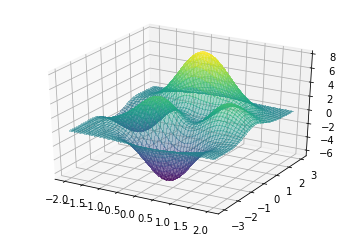

In [117]:
import matplotlib.pyplot as plt
#%matplotlib notebook    # use to activate interactive plotting 
import numpy as np

x = np.linspace(-2,2,100)
y = np.linspace(-3,3,100)

xx, yy = np.meshgrid(x, y, indexing='xy')

z = 3*((1-xx)**2) * np.exp(-(xx**2) - (yy+1)**2) \
- 10*(xx/5 - xx**3 - yy**5) * np.exp(-xx**2 - yy**2)- (1/3)* np.exp(-(xx+1)**2 - yy**2)

from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d    


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, z, cmap=cm.viridis,alpha=.4,
                       linewidth=0, antialiased=False)



plt.show()

In [106]:
plt.ioff()
%matplotlib inline

#use scatter3(Z,Y,Z) for plotting
#surf(X,Y,zz)
#image(zz)

__Exercise 1.1a. (4pts)__ Code a simple gradient algorithm. Set the parameters as follows

- learning rate = step size: 0.1 
- Max number of iterations: 20 
- Stopping criterion: 0.0001 (Your iterations should stop when your gradient is smaller than the threshold)

Then start your algorithm at 

- (x0 = 0.5, y0 = -0.5)
- (x0 = -0.3, y0 = -0.3)

And plot the iterations on top of the function (you can use the 3D plotting tools from matplolib or the simpler 'contourf' function from pyplot). What do you see ?


In [171]:
def functionOrg(ValX, ValY):
    return 3*((1-ValX)**2) * np.exp(-(ValX**2) - (ValY+1)**2) \
- 10*(ValX/5 - ValX**3 - ValY**5) * np.exp(-ValX**2 -ValY**2)- (1/3)* np.exp(-(ValX+1)**2 - ValY**2)

In [172]:
def derivativeX(ValX, ValY):
    h = 0.1
    top = functionOrg(ValX+h, ValY) - functionOrg(ValX, ValY)
    return top/h

def derivativeY(ValX, ValY):
    h = 0.1
    top = functionOrg(ValX, ValY+h) - functionOrg(ValX, ValY)
    return top/h

In [173]:
rate = 0.1
step_size_x = 0.05
step_size_y = 0.05
iterations = 0
max_iterations = 20
prec = 0.0001

x = 0.5 
y = -0.5
z1 = 3*((1-x)**2) * np.exp(-(x**2) - (y+1)**2) \
- 10*(x/5 - x**3 - y**5) * np.exp(-x**2 - y**2)- (1/3)* np.exp(-(x+1)**2 - y**2)

x_vals = []
y_vals = []
z_vals = []

x_vals.append(x)
y_vals.append(y)
z_vals.append(z1)

while step_size_x > prec and step_size_y > prec and iterations < max_iterations:
    prev_x = x
    prev_y = y
    x = x - rate * derivativeX(prev_x, y)
    y = y - rate * derivativeY(x, prev_y)
    step_size_x = abs(x - prev_x)
    step_size_y = abs(y - prev_y)
    iterations += 1
    z1 = 3*((1-x)**2) * np.exp(-(x**2) - (y+1)**2) \
- 10*(x/5 - x**3 - y**5) * np.exp(-x**2 - y**2)- (1/3)* np.exp(-(x+1)**2 - y**2)
    #print("Iteration",iterations,"\nX value is",x)
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z1)
    #print("Y value is",y)
    #print(z1)


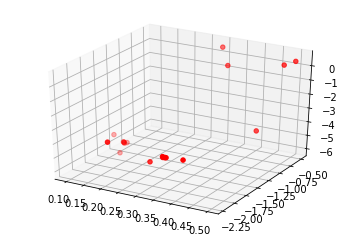

In [174]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(x_vals, y_vals, z_vals, c = 'r')

In [177]:
rate = 0.1
step_size_x = 0.05
step_size_y = 0.05
iterations = 0
max_iterations = 20
prec = 0.0001

x_vals2 = []
y_vals2 = []
z_vals2 = []

x = -0.3 
y = -0.3
z2= 3*((1-x)**2) * np.exp(-(x**2) - (y+1)**2) \
- 10*(x/5 - x**3 - y**5) * np.exp(-x**2 - y**2)- (1/3)* np.exp(-(x+1)**2 - y**2)

x_vals2.append(x)
y_vals2.append(y)
z_vals2.append(z2)


while step_size_x > prec and step_size_y > prec and iterations < max_iterations:
    prev_x = x
    prev_y = y
    x = x - rate * derivativeX(prev_x, y)
    y = y - rate * derivativeY(x, prev_y)
    step_size_x = abs(x - prev_x)
    step_size_y = abs(y - prev_y)
    iterations += 1
    #print("Iteration",iterations,"\nX value is",x)
    x_vals2.append(x)
    y_vals2.append(y)
    z2 = 3*((1-x)**2) * np.exp(-(x**2) - (y+1)**2) \
- 10*(x/5 - x**3 - y**5) * np.exp(-x**2 - y**2)- (1/3)* np.exp(-(x+1)**2 - y**2)
    #print("Y value is",y)
    z_vals2.append(z2)

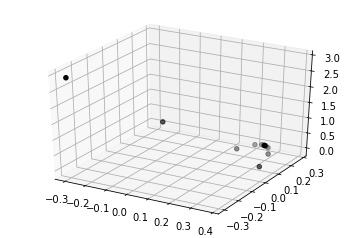

In [178]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(x_vals2, y_vals2, z_vals2, c = 'k')

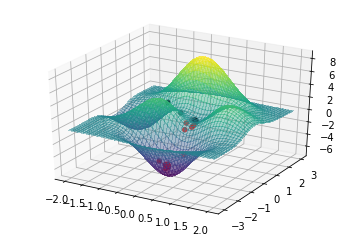

In [179]:
import matplotlib.pyplot as plt
#%matplotlib notebook    # use to activate interactive plotting 
import numpy as np

x = np.linspace(-2,2,100)
y = np.linspace(-3,3,100)

xx, yy = np.meshgrid(x, y, indexing='xy')

zz = 3*((1-xx)**2) * np.exp(-(xx**2) - (yy+1)**2) \
- 10*(xx/5 - xx**3 - yy**5) * np.exp(-xx**2 - yy**2)- (1/3)* np.exp(-(xx+1)**2 - yy**2)

from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d    


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, cmap=cm.viridis,alpha=.4,
                       linewidth=0, antialiased=False)


fig = plt.figure()
#ax = fig.add_subplot(111,projection = '3d')
ax.scatter(x_vals, y_vals, z_vals, c = 'r')

fig = plt.figure()
#ax = fig.add_subplot(111,projection = '3d')
ax.scatter(x_vals2, y_vals2, z_vals2, c = 'k')

plt.show()

In [344]:
#Manual Input Derivative
rate = 0.1
step_size_x = 0.1
step_size_y = 0.1
iterations = 0
max_iterations = 20
prec = 0.0001

df_x = lambda x: (-2 * np.exp(-2*x - x**2 - (1 + y)**2) *(-(np.exp(2*y)* (1 + x)) + 9 * np.exp(2*x)*(1 - 2*(x**2) + x**3) + np.exp(1 + 2*x + 2*y)*(3 - 51*(x**2) + 30*(x**4) + 30*x*(y**5))))/3
df_y = lambda y: (1/3)*np.exp(-(x**2) - 2*x - (y + 1)**2)*(-6*y* np.exp(2*x + 2*y + 1)*(10*(x**3) - 2*x + 5*(y**3)*(2*(y**2) - 5)) - 18*np.exp(2*x) *((1 - x)**2)*(y + 1) + 2 *np.exp(2*y) *y)

x_vals = []
y_vals = []
z1 = 3*((1-x)**2) * np.exp(-(x**2) - (y+1)**2) \
- 10*(x/5 - x**3 - y**5) * np.exp(-x**2 - y**2)- (1/3)* np.exp(-(x+1)**2 - y**2)

x = 0.5 
y = -0.5


while step_size_x > prec and step_size_y > prec and iterations < max_iterations:
    prev_x = x
    prev_y = y
    x = x - rate * df_x(prev_x)
    step_size_x = abs(x - prev_x)
    y = y - rate * df_y(prev_y)
    step_size_y = abs(y - prev_y)
    iterations += 1
    #print("Iteration",iterations,"\nX value is",x)
    x_vals.append(x)
    y_vals.append(y)
    #print("Y value is",y)


What do You See?

In [ ]:
You see the steps that the gradient descent funtion is taking to approach the optimal parameter

__Exercise 1.1b.(3pts)__ Now consider the function 

$$f(x,y) = 0.5*(x^2)+0.25*(y^4)-0.5*(y^2)$$

Plot this function using 'contourf' Then use your gradient descent algorithm with the same parameters as in __1.1.a__ and starting from the point (x0 = 1, y0 = 0). What do you observe? Choose any other initialization of the form $(x0, 0)$, same question? Explain this phenomenon ?



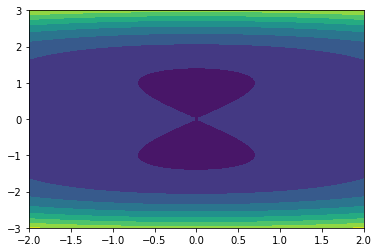

In [79]:
#import matplotlib.pyplot as plt
#%matplotlib notebook    
#import numpy as np

x = np.linspace(-2,2,100)
y = np.linspace(-3,3,100)

xx, yy = np.meshgrid(x, y, indexing='xy')

z = 0.5*((xx)**2) + 0.25 * ((yy)**4) - 0.5 * ((yy)**2)   

fig = plt.figure()

#ax = fig.add_subplot(111, projection='3d')
plt.contourf(xx,yy,z)

plt.show()


In [80]:
def function2(ValX, ValY):
    return 0.5*(ValX**2) + 0.25 * (ValY**4) - 0.5 * (ValY**2)

def df_X(ValX, ValY):
    h = 0.1
    top = function2(ValX+h, ValY) - function2(ValX, ValY)
    return top/h

def df_Y(ValX, ValY):
    h = 0.1
    top = function2(ValX, ValY+h) - function2(ValX, ValY)
    return top/h

In [104]:
#Gradient Descent
rate = 0.1
step_size_x = 0.1
step_size_y = 0.1
iterations = 0
max_iterations = 20
prec = 0.0001

#df_x = lambda x: x
#df_y = lambda y: y**3 - y

x_vals3 = []
y_vals3 = []
z_vals3 = []

x = 0 
y = 0
z3 = 0.5*(x**2) + 0.25 * (y**4) - 0.5 * (y**2) 


while step_size_x > prec and step_size_y > prec and iterations < max_iterations:
    prev_x = x
    prev_y = y
    x = x - rate * df_X(prev_x, y)
    y = y - rate * df_Y(x, prev_y)
    step_size_x = abs(x - prev_x)
    step_size_y = abs(y - prev_y)
    iterations += 1
    z3 = 0.5*(x**2) + 0.25 * (y**4) - 0.5 * (y**2)
    #print("Iteration",iterations,"\nX value is",x)
    x_vals3.append(x)
    y_vals3.append(y)
    z_vals3.append(z3)
    #print("Y value is",y)

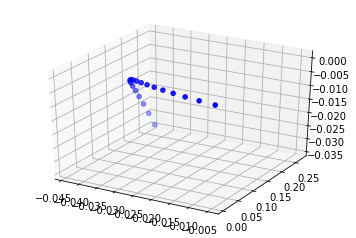

In [105]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_vals3, y_vals3, z_vals3, c = 'b')
plt.show()
#plt.scatter(x_vals3, y_vals3, z_vals3, c = 'b')

In [ ]:
plt.ioff()
%matplotlib inline

Explanation: 
Starting from the point (x0 = 1, y0 = 0). What do you observe? Choose any other initialization of the form  (x0,0)(x0,0) , same question? Explain this phenomenon ?

In [ ]:
I observe that the dots plotted about is showing a linear pattern
After changing the initializaiton, I see the convex of the dots changed the direction

# Exercise 2 (10 pts): Learning from the earth. 

We want to use your gradient descent algorithm to learn a regression model. Download the temperature data from Berkeley Earth (start with the "All land monthly data" "http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_complete.txt"). Save the corresponding text file in the folder of your notebook and use the lines below (Alternatively, you can just fork the whole repository on github). 

__Exercise 2a (3 pts)__: Use the snippet below to get the years and the temperatures stored as anomalies with respect to the average temperature (Celsius) of 8.64 +/- 0.10. Then use your gradient descent algorithm to learn a linear regression model of the form $ T(x) = \beta_0 + \beta_1 x$ where $x$ encodes the year and and $T(x)$ the temperature (anomalies). Plot your regression model on top of the data. 
    

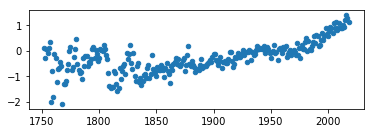

In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


data = pd.read_csv("Complete_TAVG_summary.txt", comment="%")


year = np.zeros((data.shape[0],1))
temp = np.zeros((data.shape[0],1))

for k in range(0, data.shape[0]):
    
    tmp = data.values[k]
    tmp = tmp[0]
    tmp = tmp.split()
    tmp = list(map(float, tmp))
    
    year[k] = tmp[0]
    temp[k] = tmp[1]
    

plt.figure()
plt.subplot(211)
plt.scatter(year, temp, s=20)

plt.show()

In [14]:
#X = Year, Y = temperature 
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=1e-2):
    N = float(len(y))
    for i in range(epochs):
        y_current = (m_current * X) + b_current
        #cost = sum([data**2 for data in (y-y_current)])/N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        #print(m_gradient)
        b_gradient = -(2/N) * sum(y - y_current)
        #print(b_gradient)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
    
    return m_current, b_current

In [ ]:
m, b = linear_regression(year, temp)
print("m value is",m)
print("b value is",b)

m value is [ 0.39315572]
b value is [-0.27443071]


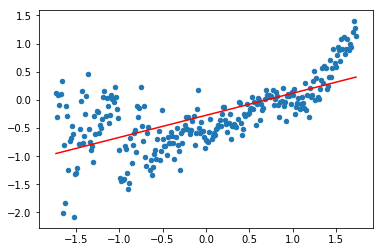

In [96]:
year_norm = (year-np.mean(year))/np.std(year)
#print(year_norm)

m, b = linear_regression(year_norm, temp)
print("m value is",m)
print("b value is",b)

# Making predictions
Y_pred = m*year_norm + b

plt.plot([min(year_norm), max(year_norm)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
#plt.show()

#plt.figure()
#plt.subplot(211)
plt.scatter(year_norm, temp, s=20)

plt.show()

__Exercise 2b (3 pts)__: Repeat the experiments with the dataset from Sierra Leone (http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/sierra-leone-TAVG-Trend.txt). Use the annual anomaly. Start in 1873 to avoid the Nan and average over the months.

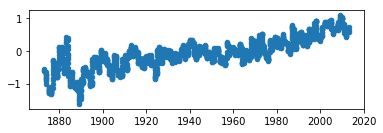

In [90]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

data2 = pd.read_csv("Sierra_Leone.txt", comment="%")

year2 = np.zeros((data2.shape[0],1))
temp2 = np.zeros((data2.shape[0],1))

for k in range(0, data2.shape[0]):
    
    tmp2 = data2.values[k]
    tmp2 = tmp2[0]
    tmp2 = tmp2.split()
    tmp2 = list(map(float, tmp2))
    
    year2[k] = tmp2[0]
    #print(year2[k])
    temp2[k] = tmp2[1]
    #print(temp2[k])
    

plt.figure()
plt.subplot(211)
plt.scatter(year2, temp2, s=20)
#plt.scatter(year, temp)

plt.show()

In [ ]:
m2, b2 = linear_regression(year2, temp2)
print("m value is",m2)
print("b value is",b2)

m value is [ 0.39886259]
b value is [-0.07742234]


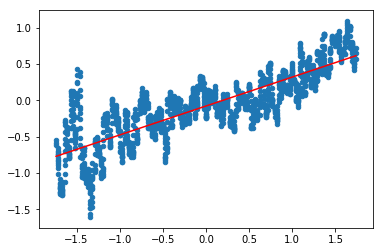

In [97]:
year_norm2 = (year2-np.mean(year2))/np.std(year2)
#print(year_norm2)

m2, b2 = linear_regression(year_norm2, temp2)
print("m value is",m2)
print("b value is",b2)

# Making predictions
Y_pred2 = m2*year_norm2 + b2

plt.plot([min(year_norm2), max(year_norm2)], [min(Y_pred2), max(Y_pred2)], color='red')  # regression line
#plt.show()

#plt.figure()
#plt.subplot(211)
plt.scatter(year_norm2, temp2, s=20)

plt.show()

__Exercise 2c (4 pts)__: For both datasets, use the function pipeline from scikitlearn (see the documentation if you are unsure how to use it) and learn a regression model on monomials up to degree 4. (In this exercise you can use the LinearRegression function from Scikit-learn)

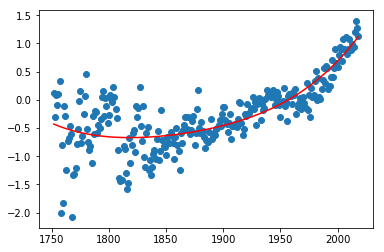

In [109]:
# from sklearn.pipeline import Pipeline
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_model = sklearn.pipeline.make_pipeline(PolynomialFeatures(4),LinearRegression())

poly_model.fit(year, temp)

temp_pred = poly_model.predict(year)

plt.scatter(year,temp)
plt.plot(year,temp_pred,color="red")

plt.show()

#y_preds = pipeline.predict(X_test)
#accuracy_score(y_test,y_preds)

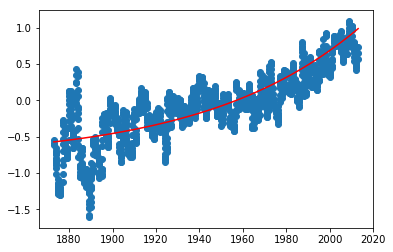

In [110]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_model2 = sklearn.pipeline.make_pipeline(PolynomialFeatures(4),LinearRegression())

poly_model2.fit(year2, temp2)

temp_pred2 = poly_model.predict(year2)

plt.scatter(year2,temp2)
plt.plot(year2,temp_pred2,color="red")

plt.show()

### Exercise 3 (18pts):  Efficient face recognition with kernels
In this third exercise, we will use the olivetti face dataset (this dataset can be loaded via scikit learn using the snippet below). 

In [144]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))

print(np.shape(data))
print(np.shape(targets))

(400, 4096)
(400,)


The data set consists of 400 faces of size 64x64 pixels which are stored in the numpy array "data" of size $60$ x $64^2$. To display an image, you then have to reshape the rows of the array "data" into a 64x64 matrix. Consider the example below. 

(400, 4096)


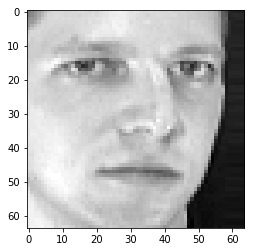

In [5]:
import numpy as np
import matplotlib.pyplot as plt

print(np.shape(data)) # size of image matrix
#print(np.shape(targets))

image1 = data[1,:].reshape((64,64))

fig, ax = plt.subplots()
ax.imshow(image1, cmap='gray') 

plt.show()


__Exercise 3a (2pts).__ The images are stored as rows of the 'data' matrix. To each row corresponds a label which represents a given ID (person) and which is stored in the vector 'targets'. In other words, the $i^{th}$ row of the matrix data is the picture of the personne represented by the ID given by targets[i]. Plots 5 faces from the same person. (use the subplot function from pyplot)

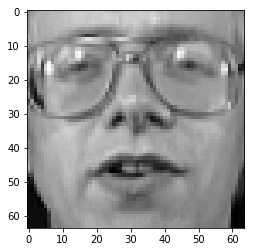

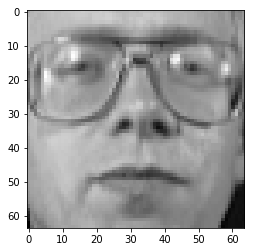

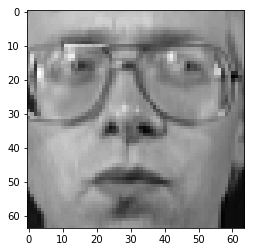

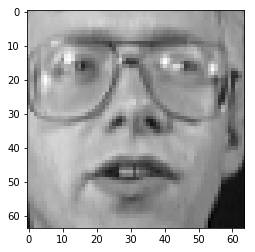

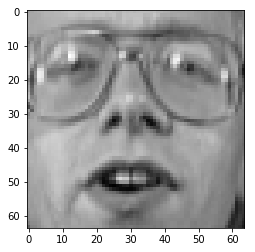

In [167]:
for i in range(5):
    image2 = data[10+i,:].reshape((64,64))
    fig, ax = plt.subplots()
    ax.imshow(image2, cmap='gray') 
    plt.show()

__Exercise 3b (1pts)__ Now that you can display the faces, we want to learn a classifier that will automatically label new pictures. 

 - Start by set of images at random between a training and a test set. (Keep 10% of the images as test set). Split the 'targets' vector accordingly to keep the ID associated to your images.



In [15]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(360, 4096) (360,)
(40, 4096) (40,)


__Exercise 3c (2pts)__
- The images are big (much bigger than the actual number of training samples) so we will work with a kernel. To define the classifier we will use the exponential kernel 

$$K(x,x') = \exp\left(-\frac{\|x-x'\|^2}{\sigma^2}\right)$$

Computing the $T$ by $T$ matrix of this kernel for your training images. 


In [171]:
def kernel(X1, X2, sigma_sq = 100, l=1.0):
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return np.exp(-sqdist / sigma_sq)
    #return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

In [186]:
import numpy as np
innerProd = np.dot(data,data.T)
mat = innerProd

#print(np.sum(X_train - np.mean(X_train))**2)
print(np.std(X_train))
#sigma_square = np.sum(X_train - np.mean(X_train))**2/(len(X_train)-1)
#print(sigma_square)
Ker = kernel(X_train, X_train)

print(np.shape(mat))
print(Ker)

0.172829
(400, 400)
[[ 1.          0.24366334  0.19716662 ...,  0.17890447  0.23525049
   0.12041025]
 [ 0.24366334  1.00000238  0.16377005 ...,  0.2914916   0.44903946
   0.09299564]
 [ 0.19716662  0.16377005  0.99999022 ...,  0.21475095  0.14954343
   0.01636129]
 ..., 
 [ 0.17890447  0.2914916   0.21475095 ...,  1.00000727  0.2938208
   0.08312319]
 [ 0.23525049  0.44903946  0.14954343 ...,  0.2938208   1.00000238
   0.12437771]
 [ 0.12041025  0.09299564  0.01636129 ...,  0.08312319  0.12437771
   0.99999756]]


__Exercise 3d (4pts)__

We would like to get an intuition of the data. However as we only kept the kernel, we now only have access to similarities between the images and we can therefore not "represent" our points directly anymore. For a given similarity matrix $K(x,x')$, it is however possible to obtain a representation of the data on a 2D or 3D space which preserves similarity (i.e if the images are close, then the 2D or 3D points will also be close) as follows:

- Take the eigendecomposition of the Kernel matrix (this will give you the eigenvalues $\lambda_i$ (sorted in descending order) and the corresponding eigenvectors $\boldsymbol v_i$)

- Take the first 2 or 3 eigenvectors (depending on whether you want a 2D or 3D representation of your data)

- The coordinates of the points (lets say $x_k$) in your 2D or 3D representation are given by $x_k = (v_1(k), v_2(k))$ (2D) or $x_k = (v_1(k), v_2(k), v_3(k))$ (3D) where $v_i(k)$ is the $k^{th}$ coordinate of the $i^{th}$ eigenvector. 

Use this approach to get 2D and 3D representation of your dataset. Plot it with 'scatter' from pyplot and use the numbers in the 'targets' vector to color your points so that different colors corresponds to different ID/persons.

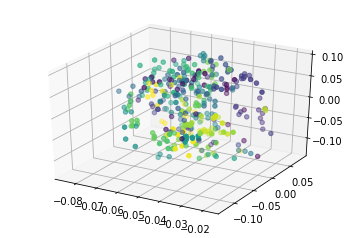

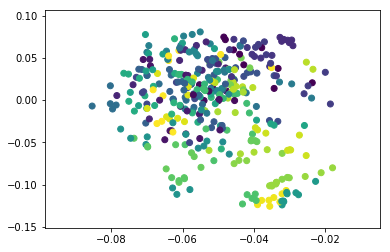

In [173]:
from numpy.linalg import eig
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

w,v = eig(Ker)

d1 = v[:,0]
d2 = v[:,1]
d3 = v[:,2]

fig3d = plt.figure()
ax3d = fig3d.add_subplot(111,projection = '3d')

ax3d.scatter(d1,d2,d3,c=y_train)
#for i in range(360):
#    ax3d.scatter(d1[i],d2[i],d3[i],c = y_train)
    
#print(d1,d2,d3)
plt.show()

plt.scatter(d1,d2,c=y_train)
#for j in range(360):
#    plt.scatter(d1[j],d2[j])
plt.show()    

How does the image dataset look like on this lower dimensional representations?

__Exercise 3d (Bonus, +2pts)__ In your opinion, how many eigenvectors are need to represent most of the information from your data?


The best number for eigenvectors will be as the same number as my data set so that all elements of the dataset can be represented fully

__Exercise 3e (9pts)__

We will now learn a linear classifier.

- start by generating the binary vectors of labels. (turn the vector of targets in a matrix containing binary vectors representing each class)

- We want to learn a classifier in feature space without computing the feature vectors $\phi(x)$

- Recall that the general formulation of a linear classifier in feature space reads as 

$$\min_{\boldsymbol \beta} J(\boldsymbol \beta)  = \min_{\boldsymbol \beta} \frac{1}{2}\sum_{n=1}^N \left\{\boldsymbol \beta^T \phi(\boldsymbol x_n) - t_n \right\} + \frac{\lambda}{2}\boldsymbol \beta^T\boldsymbol\beta, \quad (1)$$

Where $\boldsymbol \beta$ is the vector of parameters. 

- __1.__ Compute the derivative with respect to $\boldsymbol \beta$ and set it to zero to find the expression for $\boldsymbol \beta$. 
- __2.__ Write this expression for $\boldsymbol \beta$ as $\boldsymbol \beta = \boldsymbol \Phi \boldsymbol a$ where $\boldsymbol \Phi$ is the matrix whose $n^{th}$ row is given by the feature vector $\phi(\boldsymbol x_n)$ and give the corresponding expression of the vector $\boldsymbol a$.
- __3.__ Substitute the expression of $\boldsymbol \beta$ (i.e $\boldsymbol \beta = \boldsymbol \Phi \boldsymbol a$) into $(1)$ You should get a new objective $J(\boldsymbol a)$ which is now a function of $\boldsymbol a$ and of $\boldsymbol \Phi \boldsymbol \Phi^T$.

- __4__ Replace $\boldsymbol \Phi \boldsymbol \Phi^T$ with the kernel, i.e. $\boldsymbol \Phi \boldsymbol \Phi^T = K$ where $K$ is the matrix we used above 

$$K(i,j) = \exp(-\frac{\|\text{Image}_i -\text{Image}_j\|^2}{\sigma^2})$$

- __5__ To compute the classifier, use each of the following approaches (give the math details for the first two approaches)
        
  - Set the derivative of $J(\boldsymbol a)$ to zero (using matrix derivatives) and      solve for $\boldsymbol a$
        
  - Use your expression for $\boldsymbol a$ (derived in step 2) and substitute the expression for $\boldsymbol \beta = \boldsymbol\Phi \boldsymbol a$, then solve for $\boldsymbol a$
        
  - Finally modify your gradient descent algorithm to find the minimum of $J(\boldsymbol a)$ (How does the landscape look like in this case?)
        
       

In [192]:
def new_kernel(X1, X2, sigma, l=1.0):
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return np.exp(-sqdist / sigma**2)

In [194]:
new_data = data[:20]
#print(new_data)

binary = targets[:20]
#print(binary)

std = np.std(new_data)
print(std)
sigma_square = np.sum(new_data - np.mean(new_data))**2/19
#print(sigma_square)

new_Ker = new_kernel(new_data, new_data, std)
#print(new_Ker)

0.162129


In [190]:
def functionJ(a, t, l=1):
    return 0.5*a.T*new_Ker*new_Ker*a - a.T*new_Ker*t + 0.5*t.T*t + (l/2)*a.T*new_Ker*a

def df_a(a, t):
    h = 0.1
    top = functionJ(a+h, t) - function2(a, t)
    return top/h

def df_t(a, t):
    h = 0.1
    top = functionJ(a, t+h) - function2(a, t)
    return top/h

In [ ]:
rate = 0.1
step_size_x = 0.05
step_size_y = 0.05
iterations = 0
max_iterations = 100
prec = 0.0001

a = new_data 
t = binary
z2= 0.5*a.T*new_Ker*new_Ker*a - a.T*new_Ker*t + 0.5*t.T*t + (l/2)*a.T*new_Ker*a


while step_size_x > prec and step_size_y > prec and iterations < max_iterations:
    prev_x = x
    prev_y = y
    x = x - rate * derivativeX(prev_x, y)
    y = y - rate * derivativeY(x, prev_y)
    step_size_x = abs(x - prev_x)
    step_size_y = abs(y - prev_y)
    iterations += 1
    #print("Iteration",iterations,"\nX value is",x)
    x_vals2.append(x)
    y_vals2.append(y)
    z2 = 3*((1-x)**2) * np.exp(-(x**2) - (y+1)**2) \
- 10*(x/5 - x**3 - y**5) * np.exp(-x**2 - y**2)- (1/3)* np.exp(-(x+1)**2 - y**2)
    #print("Y value is",y)
    z_vals2.append(z2)


The expression of your classifier can also be written with the Kernel matrix by starting from the classifier defined on the feature vector $\phi(x)$ and $\beta$ ans substituting for $\boldsymbol \beta = \boldsymbol \Phi \boldsymbol a$ i.e.

$$ y(x) = \boldsymbol \beta^T \boldsymbol\phi(\boldsymbol x) =\boldsymbol a^T \boldsymbol \Phi\boldsymbol\phi(\boldsymbol x) = \sum_{n\in \text{training}} a_n K(x_n, x)$$

For any image from the test set, define the name of the person as the one corresponding to the largest entry in $y(x)$. Let $\hat{n}_i$ be the predicted name, and $n_i$ be the true name (i.e the number stored in 'targets'). Compute the error as 

$$\text{error} = \frac{\text{number of test images with $\hat{n}_i\neq n_i$}}{\text{Total number of test images}}$$


In [ ]:
# put your code here

